In [3]:
import pandas as pd
import numpy as np

from datasets import load_dataset

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

/Users/corti/Documents/github/NLP/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Cargar el archivo .jsonl
df_human = pd.read_json('data/machines/gemini-pro.jsonl', lines=True)
df_machine = pd.read_json('data/human.jsonl', lines=True)

# Mostrar las primeras filas del DataFrame
df_human.head()
df_machine.head()

,id,text
0,articles-cleaned-truncated/news-2021-01-01-202...,Inaugural Address by President Joseph R. Biden...
1,articles-cleaned-truncated/news-2021-01-01-202...,Fact check: Biden inauguration impacted by pan...
2,articles-cleaned-truncated/news-2021-01-01-202...,Highlights from Joe Biden's 2021 inauguration\...
3,articles-cleaned-truncated/news-2021-01-01-202...,"Biden takes the helm, appeals for unity to tak..."
4,articles-cleaned-truncated/news-2021-01-01-202...,'The Hill We Climb': Read Amanda Gorman's inau...


In [ ]:
df_human["id"]=df_human["id"].str.split('/').str[1:].str.join('/')
df_human

In [ ]:
df_machine["id"] = df_machine["id"].str.split('/').str[1:].str.join('/')
df_machine

In [ ]:
# Cargar los archivos JSONL en dataframes
df_human = pd.read_json('./data/human.jsonl', lines=True)
df_ai = pd.read_json('./data/machines/gemini-pro.jsonl', lines=True)

# Agregar la columna 'Type' con el valor 'Human' o 'AI'
df_human['label'] = 0
df_ai['label'] = 1

df_human['label']=df_human['label'].astype(np.int8)
df_ai['label']=df_ai['label'].astype(np.int8)

# Unir ambos dataframes en uno solo
df_combined = pd.concat([df_human, df_ai], ignore_index=True)
df_combined["id"] = df_combined["id"].str.split('/').str[1:].str.join('/')
df_combined = df_combined.drop(df_combined.columns[0], axis=1)
df_combined.to_json('output.json', orient='records', lines=True)
df_combined

In [11]:
import glob

# Leer todos los archivos JSONL del directorio 'data/machines/'
jsonl_files = glob.glob('./data/machine/*.jsonl')

# Lista para almacenar DataFrames de cada archivo
df_list = []

# Cargar cada archivo en un DataFrame y agregarlo a la lista
for file in jsonl_files:
    df_temp = pd.read_json(file, lines=True)
    df_temp['label'] = 1  # Agregar la columna 'label' con valor 1 para indicar AI
    df_temp['label'] = df_temp['label'].astype(np.int8)
    df_list.append(df_temp)

# Combinar todos los DataFrames en uno solo
df_ai_combined = pd.concat(df_list, ignore_index=True)

# Cargar el archivo JSONL de humanos
df_human = pd.read_json('./data/human.jsonl', lines=True)
df_human['label'] = 0  # Agregar la columna 'label' con valor 0 para indicar Humano
df_human['label'] = df_human['label'].astype(np.int8)

df_combined = pd.concat([df_human, df_ai_combined], ignore_index=True)

# Modificar la columna 'id' eliminando la primera parte antes de '/'
df_combined["id"] = df_combined["id"].str.split('/').str[1:].str.join('/')

# Eliminar la primera columna (si es necesario)
df_combined = df_combined.drop(df_combined.columns[0], axis=1)

# Guardar el DataFrame combinado en un archivo JSONL
df_combined.to_json('output.json', orient='records', lines=True)

# Mostrar el DataFrame combinado
df_combined

,text,label
0,Inaugural Address by President Joseph R. Biden...,0
1,Fact check: Biden inauguration impacted by pan...,0
2,Highlights from Joe Biden's 2021 inauguration\...,0
3,"Biden takes the helm, appeals for unity to tak...",0
4,'The Hill We Climb': Read Amanda Gorman's inau...,0
...,...,...
15213,Gabby Petito's Disappearance: How Social Media...,1
15214,Authorities Searching for Missing 22-Year-Old ...,1
15215,University of Wisconsin Oshkosh Student Comes ...,1
15216,Wyoming Coroner Rules Gabby Petito's Death a H...,1


In [12]:
emotions_local = load_dataset("json", data_files="output.json")

df = pd.DataFrame(emotions_local['train']) 

# Separa en train y test
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Muestra la cantidad de ejemplos en cada conjunto
print(f"Número de ejemplos en el conjunto de entrenamiento: {len(train_df)}")
print(f"Número de ejemplos en el conjunto de prueba: {len(test_df)}")

display(train_df.sample(5))
display(test_df.sample(5))

Generating train split: 15218 examples [00:00, 123496.50 examples/s]


Número de ejemplos en el conjunto de entrenamiento: 12174
Número de ejemplos en el conjunto de prueba: 3044


,text,label
6457,Winter Storm Lana Leaves Trail of Destruction ...,1
11802,"CNN – Washington, DC\n\nIn a historic and unpr...",1
13964,"""Brady's Attempt to Hide Nike Logo at Super Bo...",1
381,Americans Had It Easy During the Facebook Outa...,0
11325,Escaping the Palace: Lifetime's Dramatic Take ...,1


,text,label
4398,"January 6, 2021: The Day America Reckoned with...",1
8323,Oxford Community Rallies Financial Support for...,1
2425,FDA and CDC Lift Recommended Pause on Johnson ...,1
7623,A Purple Reign: Inauguration Day's Royal Hue C...,1
2154,Long Island Woman Missing During Cross-Country...,1


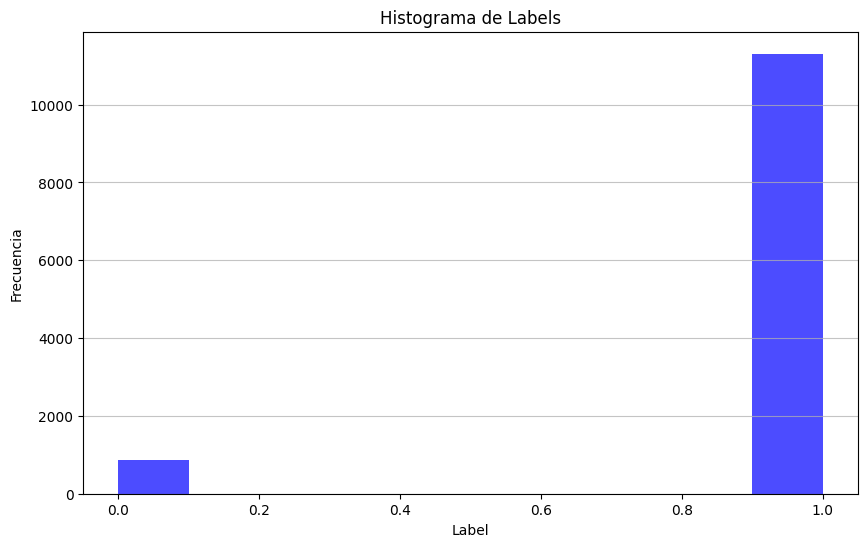

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(train_df["label"], color='blue', alpha=0.7)
plt.title('Histograma de Labels')
plt.xlabel('Label')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
# plt.xticks(range(train_df["label"].min(), train_df["label"].max() + 1))
plt.show()